In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
occupancy_grid = np.load("occupancy_grid.npy")


In [79]:
grid = occupancy_grid
upperbound = []
lowerbound = []
for x in range(2, grid.shape[0]-2):
    for y in range(2, grid.shape[1]-2):
        if grid[x, y] == 1 and (grid[x, y+1] == 0 or y == grid.shape[1]-1):
            upperbound.append((x, y))
        if grid[x, y] == 1 and (grid[x, y-1] == 0 or y == 1):
            lowerbound.append((x, y))

obstacles = []
for i in range(len(lowerbound)):
    linked = False
    x1 = lowerbound[i][0]
    y1 = lowerbound[i][1]
    x2 = upperbound[i][0]
    y2 = upperbound[i][1]
    i = 0
    nobst = len(obstacles)
    while linked == False and i < nobst:
        if obstacles[i][2] == (x1 - 1) and obstacles[i][2] == (x2 - 1) and obstacles[i][1] == y1 and obstacles[i][3] == y2:
            obstacles[i][2] = x2
            obstacles[i][3] = y2 
            linked = True
        i += 1
    if linked == False:
        obstacles.append(np.array([x1, y1, x2, y2]))


[array([ 2, 10, 18, 11]), array([ 7, 23,  7, 46]), array([ 8, 45, 24, 46]), array([19, 10, 19, 33])]


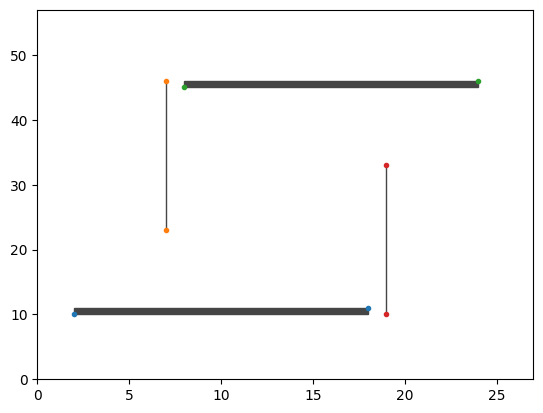

In [80]:
fig, ax = plt.subplots(1, 1)

##Plot obstacles
for i in range(len(obstacles)):
   ax.add_patch(Rectangle((obstacles[i][0], obstacles[i][1]), (obstacles[i][2] - obstacles[i][0]), (obstacles[i][3] - obstacles[i][1]), color = '#454545'))

##Plot obstacle corners
for i in range(len(obstacles)):
   ax.scatter((obstacles[i][0], obstacles[i][2]), (obstacles[i][1], obstacles[i][3]), s = 9)

##Plot upper and lower bounds
# for i in range(len(upperbound)):
#     ax.scatter(upperbound[i][0], upperbound[i][1], color = "#FF0000", s = 0.5)
# for i in range(len(lowerbound)):
#     ax.scatter(lowerbound[i][0], lowerbound[i][1], color = "#00FF00", s = 0.5)

plt.xlim(0, xlength)
plt.ylim(0, ylength)
print(obstacles)